<h2><b><u>Case Study: Planning a  Float Trip </u></b></h2>

<h3><b><i>Background</i></b></h3>
The United States Geological Survey (USGS) maintains a vast network of equipment to monitor and provide measurements of surface water features such as streams. A stream is a surface water feature in which water flows and includes features such as creeks and rivers [2].  The National Streamflow Network provides continuous streamflow measurements of attributes such as stage (water height) and streamflow (discharge) by taking measurements at 15 minute intervals using a streamgage [1]. Streamflow is <i>"the volume of water moving down a stream per unit of time" at a particular location</i> [1]. Streamgages may also measure other attributes of a stream, e.g. turbidity, dissolved oxygen, total nitrogen, temperature, and more" [3]. 

In addition to their scientific purposes, streamgage data can be useful for planning recreational activities on a given stream. For example, streamflow and gage height could be used to gain an idea of if floating a particular stream is possible. Streamflow data could help with determining if the water is moving too quickly to safely float. Gage height could determine if the water level is enough for a canoe or kayak to float. Of course <b><i>there are many other factors that determine if it is possible or safe to float a stream that must be considered!</i></b> However, examining streamgage data from home can be a good first step in planning a float trip.

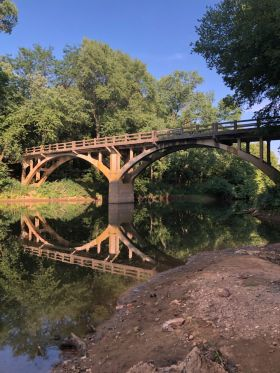 

<h3><b><i>Goal</i></b></h3>
You are planning a hiking trip to <a href = "https://www.arkansasstateparks.com/parks/withrow-springs-state-park">Winthrow Springs state park</a>. While researching the park, you've found that in addition to trails, the park also has an access area to War Eagle Creek from which canoes can be launched. (The image above is of War Eagle Creek, but not at that particular access area). You only want to bring your canoe with you if the creek is floatable.

The goal of this Case Study will be to examine streamgage data from gage #07049000 located on War Eagle Creek to estimate the conditions of the creek for floating. Although streamgage #07049000 is located downstream from the War Eagle Creek access point, it is the closest streamgage to it. This Case Study is designed to help you practice and gain familiarity with <b><i>exploratory analysis</i></b> of a real dataset based on topics you've learned in DataCamp's <a href="https://learn.datacamp.com/courses/exploratory-data-analysis-in-python">Exploratory Data Analysis in Python</a> course and in DASC 2113 Lecture. 


<h3><b><i>Data</i></b></h3>
Data from two main sources will be used in this Case Study. The first source is the streamgage data for gage #07049000. This data was extracted for a three day period, 09/04/2021 to 09/07/2021, using the USGS Instantaneous Values Web Service [4]. It contains the attributes <i>streamflow in ft^3/s</i> and <i>gage height_ft</i>. No additional attributes are recorded at this particular streamgage. The second data source is NOAA's "Weather Observations for the Past three days" for the Springdale Municipal Airport [5]. This was accessed for 09/04/2021 - 09/07/2021 and measurements were reported in one hour intervals. <i>Air Temperature (F)</i> and <i>Precipitation 1 hour(in)</i> were extracted from the data. This data was then matched to the closest time measurement in the stream gauge data. If weather data was missing for a particular hour, then the corresponding time period in the USGS data was removed. The resulting dataset is stored as an Excel Spreadsheet. 

Two attributes which will also be referred to as variables, <i>streamflow in ft^3/s</i> and <i>gage_height_ft</i> are the focus of the majority of this case study. <i>Streamflow in ft^3/s</i> is designated as the <b><i>dependent variable</i></b> and <i>gage_height_ft</i> as the <b><i>independent</i></b> variable. 

Additional data for the map portion of this Case Study comes from two datasets. The High Resolution: National Hydrography Dataset Flowline Feature of Arkansas hosted by the the Arkansas GIS Office and published by the USGS [6] and the Arkansas Counties Shapefile extracted from the U.S. Census Bureau TIGER/LINE data [7]. This Arkansas Counties Shapefile is the same one used in the Week 04 Case Study. 

Sources: 
<ol style = "font-size:8px">
    <li>USGS. 2021. "Streamgaging Basics". Water Resources. https://www.usgs.gov/mission-areas/water-resources/science/streamgaging-basics</li>
    <li>National Geographic. 2021. Resource Library Encyclopedic Entry. https://www.nationalgeographic.org/encyclopedia/steam  </li>
    <li>USGS. 2021. "Parameter code definition". National Water Information System: Help System. https://help.waterdata.usgs.gov/parameter_cd?group_cd=%</li>
    <li>USGS. 2021. "USGS Instantaneous Values Web Service". https://waterservices.usgs.gov/rest/IV-Service.html</li>
    <li>NOAA. 2021. Springdale Municipal Airport. Weather Observations for the Past three days". https://w1.weather.gov/data/obhistory/KASG.html</li>
    <li>USGS. 2013. "High Resolution: National Hydrography Dataset Flowline Feature (line). Arkansas GIS Office. https://gis.arkansas.gov/product/high-resolution-national-hydrography-dataset-flowline-feature-line . </li>
    <li>U.S. Census Bureau. 2019. "2019 TIGER/Line with Selected Demographic and Economic Data".  https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-data.html </li>
</ol>



<h4><u>Importing libraries</u></h4>

<span class="bltn">Import</span> panda, matplotlib.pyplot, numpy, geopandas, seaborn, and scipy's stats package in the Code cell below. 

<b><i>If you do not have scipy or seaborn installed you will need to do so to complete this Case Study</i></b>. 

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from scipy import stats
import seaborn as sns
import geopandas as gpd

<h4><u>Read in Data</u></h4>

The <span class="str">gage_war_eagle.xlsx</span> file is opened using panda's <b>ExcelFile</b> object. It contains two spreadsheets, <span class = "str">Overview and 07049000</span>. The <span class="str">Overview</span> spreadsheet contains metadata about the streamgages location. The <span class="str">07049000</span> spreadsheet contains the actual data for use in the Case Study. 


In [11]:
# File name
usgs_fname = "./Data/gage_war_eagle.xlsx"

# Open Excel file using pandas
# Import the Excel spreadsheet using panda's ExcelFile(). 
usgs_ef = pd.ExcelFile(usgs_fname)

# Print the sheet names using .sheet_names
usgs_ef.sheet_names

['07049000', 'Overview']

Both spreadsheets are converted to a DataFrame using panda's <b>parse</b> function. <span class="str">Print</span> the <b><i>gage_over_df</i></b>. <span class="bltn">Print</span> the <span class="num">first 5 rows</span> of the streamgage data stored in <b><i>we_df</i></b>. Also <span class="bltn">print</span> metadata on the columns and their data types by using <b>we_df.info()</b>. 

In [12]:
# Load the overview sheet into df
gage_ovr_df = usgs_ef.parse("Overview")

# Print gage_ovr_df
print(gage_ovr_df)

# Load war_eagle_21. Includes air temp data 
we_df = usgs_ef.parse("07049000")

# Print first 5 rows of we_df
print(we_df)
# Print info on we_df
print(we_df.info())

   site_no                                name   lat     lon    type  \
0  7049000  war eagle creek near hindsville ar  36.2 -93.855  stream   

   gage_alt          subbasin  
0   1168.06  beaver reservoir  
    agency_cd  site_no            datetime  streamflow_cfs  gage_height_ft  \
0        USGS  7049000 2021-09-04 15:45:00            29.8            0.41   
1        USGS  7049000 2021-09-04 16:00:00            29.8            0.41   
2        USGS  7049000 2021-09-04 16:15:00            29.8            0.41   
3        USGS  7049000 2021-09-04 16:30:00            29.8            0.41   
4        USGS  7049000 2021-09-04 16:45:00            29.8            0.41   
..        ...      ...                 ...             ...             ...   
181      USGS  7049000 2021-09-07 13:00:00            30.8            0.43   
182      USGS  7049000 2021-09-07 13:15:00            30.8            0.43   
183      USGS  7049000 2021-09-07 13:30:00            30.8            0.43   
184      US

Pandas stored most of the attributes as the correct data type automatically. <i>Site_No</i> should techinically be a <span class="str">string</span> however for this Case Study's purposes, its fine as is. 

The two attributes of interest are <i>streamflow_cfs</i> and <i>gage_height_ft</i>. <i>Streamflow_cfs</i> represents the streamflow in ft^3/s and <i>gage_height_ft</i> the height of the water for a particular time point (<i>datetime</i>) at a particular location (<i>site_no</i>). Both of these have the correct data type of <span class="num">float </span>. 

In this Case Study, <i>streamflow_cfs</i> will be desginated as the dependent variable (y). <i>Gage_height_ft</i> will be designated as the independent variable (x). 

<h4><u>Mapping the Streamgage Location</u></h4>

To get an idea of the approximate location of streamgage 07049000, let's map it. This map will contain <span class="num">3</span> layers: the Arkansas Counties as a polygon feature, the streamgage as a point feature, and the approximate path of War Eagle Creek as a polyline feature. 

It's okay if you're unfamiliar with the different types of geospatial features mentioned above. What's important in this section is the resulting output map from the Code cell below. The map can help visualize the approximate location of where this streamgage is located. From the map, it looks like the streamgage is located far downstream on War Eagle Creek. 

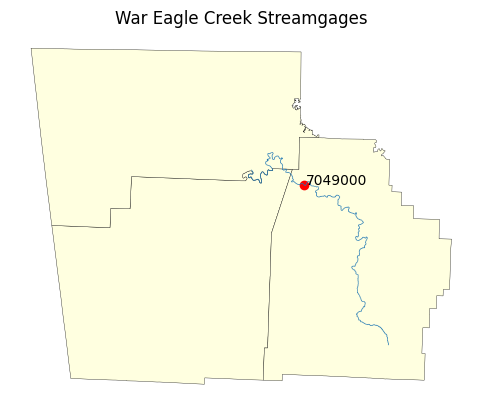

In [14]:
# Import the AR Counties file 
county_file = "../Case-Study-04-main/Data/ACS_2019_5YR_COUNTY_AR.shp"
ar_counties = gpd.read_file(county_file)

# Set projection to UTM Zone 15N EPSG:26915
ar_counties = ar_counties.to_crs(epsg=26915)

# Extract Benton, Madison, and Washington Counties
nwa_county = ar_counties[ar_counties["NAME"].isin(["Madison", "Washington", "Benton"])]

# Create two columns for UTM coordinates 
gage_ovr_df.loc[gage_ovr_df.site_no == 7049000, "UTM_x" ] = 423135.05477186036
gage_ovr_df.loc[gage_ovr_df.site_no == 7049000, "UTM_y" ] = 4006470.4810216003

# Convert the gage_ovr_df into a GeoDataFrame. Specify the geometry as the UTM values 
gage_ovr_gdf = gpd.GeoDataFrame(gage_ovr_df, geometry = gpd.points_from_xy(gage_ovr_df.UTM_x, gage_ovr_df.UTM_y), crs = "EPSG:26915")

# Read in stream gsjon 
war_eagle_nhd = gpd.read_file("Data/war_eagle_nhd.geojson")

# Set projection to UTM Zone 15N EPSG:26915. It should already be projected but this ensures it is
war_eagle_nhd = war_eagle_nhd.to_crs(epsg=26915)

# Create the figure for the map 
figure, ax = plt.subplots(1,1)
ax.title.set_text("War Eagle Creek Streamgages")
plt.axis("off")

# Label the streamgage
ax.annotate(gage_ovr_gdf.iloc[0].site_no, xy = (gage_ovr_gdf.iloc[0].geometry.x, gage_ovr_gdf.iloc[0].geometry.y), xytext = (1, 1), textcoords="offset points")

# Add the three layers 
nwa_county.plot(facecolor = "lightyellow", edgecolor = "black", linewidth = .25, ax=ax)
war_eagle_nhd.plot(ax = ax, linewidth = .50)
gage_ovr_gdf.plot(ax = ax, facecolor = "red")

# Display the plot
plt.show()

<h4><u>Select a Random Subset</u></h4>

Streamflow data is techincally time series data and is sampled at regular 15 minute intervals. Instead of using the full range of data stored in <b><i>we_df</i></b> a random subset of the data will be sampled. This is done using pandas <b>sample</b> method. <span class="num">100</span> random rows of the DataFrame are selected. The <b><i>random_state</i></b> is set to 0 to ensure that the same rows of data are selected each time this Case Study is run. The index of the results is reset to begin at 0 by specifying that <b><i>ignore_index</i></b> is <span class="bltn">True</span>. 

Display the <span class="num">first 5 rows</span> of <b><i>we_rnd_df</i></b> which stores the randomly selected rows from <b><i>we_df</i></b> . 

In [15]:
# Generate a random sample 
we_rnd_df = we_df.sample(n = 100, random_state = 0, axis = 0, ignore_index = True)

# Display first 5 rows of we_rnd_df
we_rnd_df.head()

,agency_cd,site_no,datetime,streamflow_cfs,gage_height_ft,air_temp,precip_in_1_hr
0,USGS,7049000,2021-09-06 10:15:00,32.4,0.46,75,0
1,USGS,7049000,2021-09-05 11:00:00,33.4,0.48,73,0
2,USGS,7049000,2021-09-07 07:15:00,30.3,0.42,63,0
3,USGS,7049000,2021-09-05 15:30:00,32.9,0.47,82,0
4,USGS,7049000,2021-09-06 17:30:00,31.9,0.45,90,0


<h4><u>Extracting Streamflow and Gage Height</u></h4>. 

Both <i>streamflow_cfs and gage_height_ft</i> need to be extracted as <b><i>sflow</i></b> and <b><i>height</i></b> from <b><i>we_rnd_df</i></b>. <b><i>sflow</i></b> represents the dependent variable and <b><i>height</i></b> represents the independent variable. 

In [16]:
# Extract streamflow_cfs and gage_height_ft as Series. 
sflow = we_rnd_df["streamflow_cfs"]
height = we_rnd_df["gage_height_ft"]

<h4><u>Descriptive Statistics</u></h4>

Descriptive statistics about the two attributes are computed using pandas <b>describe method</b>. This method does not include a calculation for the <b><i>variance</i></b>. Variance can be calculated using pandas <b>var</b> method. <span class="bltn">Print</span> both the descriptive statistics and variance for <b><i>sflow</i></b> and <b><i>height</i></b>. 

In [17]:
# Calculate descriptive statistics
sflow_stats = sflow.describe()
height_stats = height.describe()

# Sample variance 
sflow_var = sflow.var()
height_var = height.var()

# Print resulting statistics 
print(sflow_stats)
print(height_stats)

count    100.000000
mean      31.876000
std        1.240081
min       29.300000
25%       30.800000
50%       31.900000
75%       32.900000
max       34.000000
Name: streamflow_cfs, dtype: float64
count    100.000000
mean       0.450100
std        0.023889
min        0.400000
25%        0.430000
50%        0.450000
75%        0.470000
max        0.490000
Name: gage_height_ft, dtype: float64


<h4><u>Plots</u></h4>

The next step is to visualize the data for <b><i>sflow and height</i></b>. This is first done using matplotlib's <b>plot</b> method. 

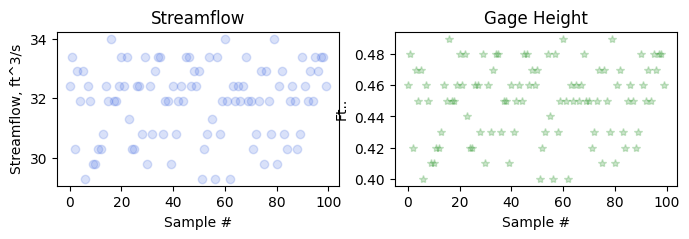

In [18]:
figure, axs = plt.subplots(1,2, figsize = (8,2))
axs[0].title.set_text("Streamflow")
axs[0].set_xlabel("Sample #")
axs[0].set_ylabel("Streamflow, ft^3/s")
axs[0].plot(sflow, "o", color = "royalblue", alpha = .2)

axs[1].title.set_text("Gage Height")
axs[1].set_xlabel("Sample #")
axs[1].set_ylabel("Ft..")
axs[1].plot(height,"*", color = "green", alpha =.2)

plt.show()


<h4><u>Histogram</u></h4>

Next, the histograms for <b><i>sflow and height</i></b> are generated. The number of <b><i>bins</i></b> is set to <span class = "num">3</span> to more clearly illustrate the difference in the next plot you'll make. 

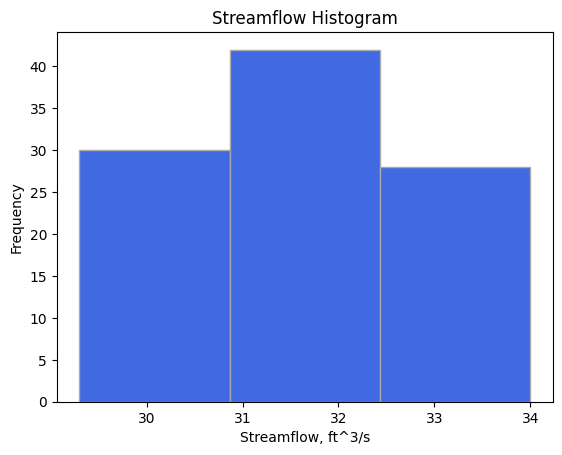

In [19]:
plt.title("Streamflow Histogram")
plt.xlabel("Streamflow, ft^3/s")
plt.ylabel("Frequency")
plt.hist(sflow, bins = 3, color = "royalblue", edgecolor="darkgrey")
plt.show()

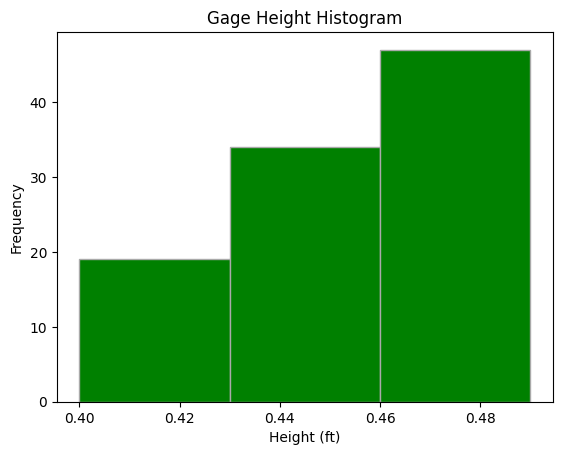

In [20]:
plt.title("Gage Height Histogram")
plt.xlabel("Height (ft)")
plt.ylabel("Frequency")
plt.hist(height, bins = 3, color = "green", edgecolor="darkgrey")
plt.show()

<h4><u>Empirical PMF and CDF</u></h4>

<i>Streamflow_cfs</i>, now stored as <b><i>sflow</i></b>, consists of continuous data. In order to practice using the <b><i>PMF bar plot</i></b> and <b><i>CDF plot</i></b> like the ones shown in DataCamp's Exploratory Data Analysis Chapter 2, the data needs to be discrete. Let's discretize the values of <b><i>sflow</i></b> and store the result as <b><i>sflow_int</i></b>. 

First, let's create a Series called <b><i>sflow_int</i></b> and round the values in <b><i>sflow</i></b> using pandas <b>round</b> method. <b><i>Sflow_int</i></b> consists of integer values from [29, 34] only. 

Note, that <b><i>sflow_int</i></b> is only used for this section to illustrate how to use the PMF bar chart with a dataset and will not be used outside this section. The continuous variable <b><i>sflow</i></b> will be used for all other sections. 

In [21]:
# Round the values to integers
sflow_int = sflow.round()

# Print the first 5 values 
sflow_int.head()

0    32.0
1    33.0
2    30.0
3    33.0
4    32.0
Name: streamflow_cfs, dtype: float64

The next step is to calculate the <b><i>emperical probability</i></b> of observing each discrete value stored in <b><i>sflow_int</i></b>. In DataCamp this was done using the PMF and CDF classes. The Code cell below will show you how this can be calculated step-by-step. 

First the values of <b><i>sflow_int</i></b> need to be sorted using pandas <b>sort_values</b> method. The count of each value is calculated using <b>value_counts</b> and the results stored as a DataFrame. Column names in the DataFrame are updated. The DataFrame is then sorted by the discrete values in <b><i>sflow_int</i></b> from smallest to largest. Because these values are stored as the <b><i>index<i></b>, <b>sort_index</b> must be used. Finally, the probability of observing a value is calculated by dividing the number of times that value occured in the sample by the total number of observations in the sample. 

In [22]:
# Sort the discrete values from smallest to largest 
sflow_sorted = sflow_int.sort_values()

# Store results as DataFrame 
sflow_counts = sflow_sorted.value_counts().to_frame()

# Rename columns 
sflow_counts.columns = ["sflow_counts"]
sflow_counts["sflow_orig"] = sflow_counts.index

# Sort the DataFrame by indexfrom smallest to largest 
sflow_counts = sflow_counts.sort_index()

# For each value in sflow_int, divide the # of times it occured by the total number of samples 
sflow_counts["prob"] = sflow_counts["sflow_counts"]/sflow_counts["sflow_counts"].sum()

# Rename the DataFrame with a new variable that more clearly reflects its contents
sflow_eprob = sflow_counts

# Display the resulting dataframe
print(sflow_eprob)

                sflow_counts  sflow_orig  prob
streamflow_cfs                                
29.0                       4        29.0  0.04
30.0                      15        30.0  0.15
31.0                      13        31.0  0.13
32.0                      40        32.0  0.40
33.0                      25        33.0  0.25
34.0                       3        34.0  0.03


The DataFrame created above, <b><i>sflow_eprob</i></b>, now contains the emperical probabilites for the discretized values in <b><i>sflow_int</i></b>. Using these the <b><i>PMF bar plot</i></b> can be created with seaborn's <b>barplot</b> method. This wil be done based on DataCamp's Exploratory Data Analysis Chapter 2. 

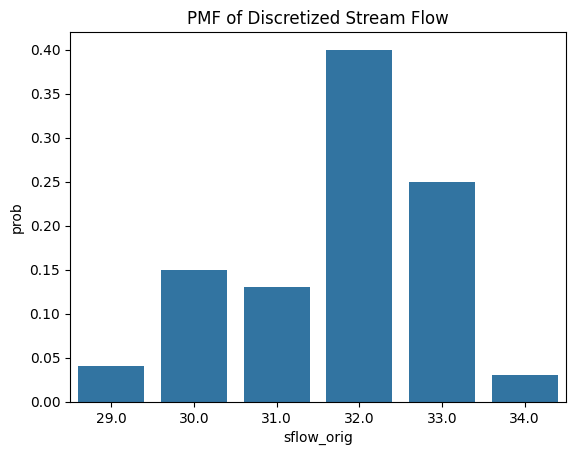

In [23]:
# PMF Bar Plot
plt.title("PMF of Discretized Stream Flow")
sns.barplot(x = sflow_eprob["sflow_orig"], y = sflow_eprob["prob"], data = sflow_eprob)
plt.show()

The resulting bar plot shows each discrete value on the x-axis and the probability of it occuring on the y-axis. Each value is stored as its own bin in the plot. Next let's look at the emperical CDF for the discrete values in represented in <b><i>sflow_int</i></b> using the <b><i>sflow_eprob</i></b> DataFrame. 

The <b><i>emperical CDF</i></b> is caluclated below. First, a new column is created in <b><i>sflow_eprob</i></b> to hold the values calculated for the CDF. Next, for each discrete streamflow value, (29, 30, ...34), the <i>probability (prob)</i> of that value occuring is added to the <i>probability (prob)</i> of the previous streamflow values occuring.

In [24]:
# Create a new column 
sflow_eprob["cdf"] = 0

# Loop through each discrete value (row in sflow_eprob)
for idx in range(0, len(sflow_eprob["prob"])):
    # The first value only needs to store its probability. There's no previous values to incorporate. 
    if idx == 0:
        sflow_eprob["cdf"].iat[idx] = sflow_eprob["prob"].iloc[idx]
    else:
        # Stores the cummulative sum of probabilities 
        temp_prob = 0.0
        
        # Create a counter equal to the row index of the current discrete value 
        counter = idx
        
        # Loop through the previous rows 
        while counter >= 0:
            # Append the previous rows' probabilities to the current
            temp_prob += sflow_eprob["prob"].iloc[counter]
            
            # Decrement the counter
            counter -= 1
        
        # Update the value in the cdf column with the cummulative probability 
        sflow_eprob["cdf"].iat[idx] = temp_prob

# Display the results 
print(sflow_eprob)

                sflow_counts  sflow_orig  prob   cdf
streamflow_cfs                                      
29.0                       4        29.0  0.04  0.04
30.0                      15        30.0  0.15  0.19
31.0                      13        31.0  0.13  0.32
32.0                      40        32.0  0.40  0.72
33.0                      25        33.0  0.25  0.97
34.0                       3        34.0  0.03  1.00


C:\Users\tstig\AppData\Local\Temp\ipykernel_5936\3126224079.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.04' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  sflow_eprob["cdf"].iat[idx] = sflow_eprob["prob"].iloc[idx]




The emperical CDF has now been calculated for the discrete streamflow values. Next, the emperical CDF can be plotted using matplotlib's <b>plot</b> function. 

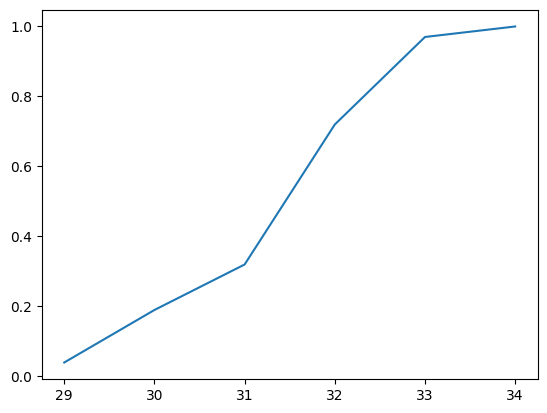

In [25]:
# Plot the discrete value CDF
plt.plot(sflow_eprob["cdf"])
plt.show()

In the section above you learned how to calculate an emperical PMF and CDF for discrete valued data based on a sample. This was possible because the continuous <i>streamflow</i> variable was converted to an integer and treated as a discrete data type for illustration purposes. However, <i>streamflow</i> is continuous and should be treated as such. 

Creating a PDF plot and CDF plot of of the continuous streamflow data stored in <b><i>sflow</i></b> will be covered below. 

<h4><u>Creating a Continuous Normal Random Varirable Using SciPy</u></h4>

As a reminder, the dependent variable in this Case Study is <i>streamflow</i>. The sample data for <i>streamflow</i> was extracted and stored in the variable <b><i>sflow</i></b>. Since the data stored in <b><i>sflow</i></b> is continuous, a PDF will be used to represent the distribution. Let's plot the pdf for the sample data stored in <b><i>sflow</i></b>. 

The created PDF plots and CDF plots used are based on Jason Brownlee's <a href = "https://machinelearningmastery.com/probability-density-estimation/">A Gentle Introduction to Probability Density Estimation</a> and SciPy's <a href = "https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html">scipy.stats.norm documentation</a>. 

First the sample mean and sample standard deviation are calculated for <b><i>sflow</i></b> using pandas <b>mean</b> and <b>std</b> methods. Next, a <b><i>normal continous random variable</i></b> (RV) is generated using scipy's <b>norm</b> and stored as <b><i>sflow_rv</i></b>. The center of the RV is shifted to occur at <b><i>sflow_mean</i></b> and the scale of the RV is set to <b><i>sflow_std</i></b>. The RV represented by <b><i>sflow_rv</i></b> can be used to calculate the PDF and CDF.

In [26]:
# Extract the sample mean and standard deviation from sflow
sflow_mean = sflow.mean()
sflow_std = sflow.std()

# Create a normal random variable shifting the location to sflow_mean and the scale to sflow_std
sflow_rv = stats.norm(sflow_mean, sflow_std)

<h4><u>Streamflow PDF</u></h4>

Now that the continuous RV <b><i>sflow_rv</i></b> has been created, it can be used to calculate and plot the PDF. The first step is to sort the values stored in <b><i>sflow</i></b> from smallest to largest using pandas <b>sort_values</b> method and store them in the variable <b><i>sflow_ordered</i></b>. <b><i>Sflow_ordered</i></b> will represent the values stored on the x-axis of the PDF plot. A variable <b><i>sflow_pdf_output</i></b> stores the output of the normal probability density function for each value in <b><i>sflow_ordered</i></b>. <b><i>Sflow_pdf_output</i></b> will be displayed on the y-axis of the plot. The plot is created using matplotlib's <b>plot</b> function. 

Also include on this plot is the PDF curve of a list of hypothetical values. This list of continuous values ranging from [29, 34] is generated using NumPy's <b>arange</b> function using increments of .1 and stored in the variable <b><i>x_val_range</i></b>. The output of the probability density function for each value in <b><i>x_val_range</i></b> is stored in <b><i>sflow_xrange_output</i></b>. 

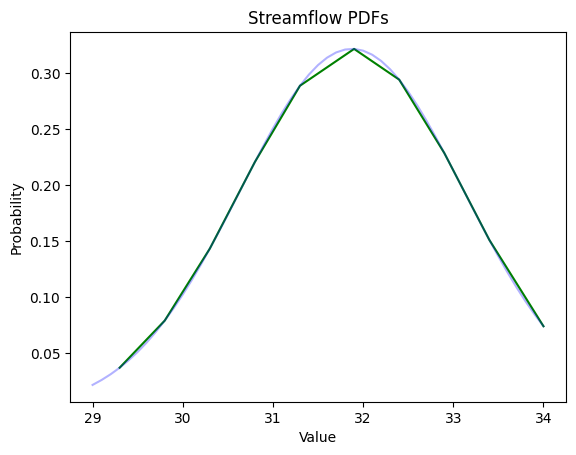

In [27]:
# Sort the values in sflow 
sflow_ordered = sflow.sort_values().copy()

# Calculate the probability of each value occuring using the RV PDF
sflow_pdf_output = sflow_rv.pdf(sflow_ordered)
plt.plot(sflow_ordered, sflow_pdf_output, color = "green")

# Generate values from 29 -34 in .1 increments 
x_val_range = np.arange(29, 34.01, .1)

# Calculate the probability of each value in x_val_range 
sflow_xrange_output = sflow_rv.pdf(x_val_range)
plt.plot(x_val_range, sflow_xrange_output, color = "blue", alpha = .3)

# Add title and labels 
plt.title("Streamflow PDFs")
plt.xlabel("Value")
plt.ylabel("Probability")

plt.show()

The PDF curve for the sample data <b><i>sflow</i></b> appears to be relatively close to the PDF curve represented by the theoretical <b><i>x_val_range</i></b> data. 

<h4><u>Streamflow CDF</u></h4>

The CDF of streamflow can also be created and plotted. The process is almost identical to the PDF creation above. Both <b><i>sflow_ordered</i></b> and <b><i>x_val_range</i></b> will be used however instead of the <b>pdf</b> method the <b>cdf</b> method is used. 


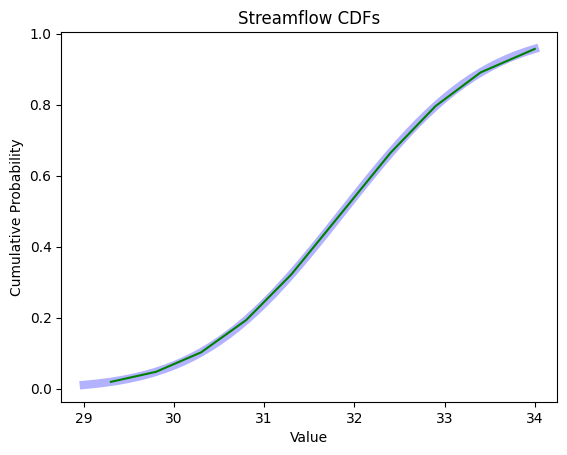

In [28]:
# CDF of theoretical x values
xvals_cdf_output = sflow_rv.cdf(x_val_range)
plt.plot(x_val_range, xvals_cdf_output, color = "blue", alpha = .3, linewidth = 6)

# CDF of sample 
sflow_cdf_output = sflow_rv.cdf(sflow_ordered)
plt.plot(sflow_ordered, sflow_cdf_output, color = "green")

# Add title and labels 
plt.title("Streamflow CDFs")
plt.xlabel("Value")
plt.ylabel("Cumulative Probability")

plt.show()

As in the PDF plots, the CDF plots of both <b><i>sflow_ordered</i></b> and <b><i>x_val_range</i></b> look very close. In addition to using the <b>cdf</b> method with <b>plot</b> it can also be used to predict the probability of certain values occuring. Let's look at some examples. 

<b><u>Example 1: </u></b>

What is the probability of a streamflow value <b><i>less than or equal to </i></b> 33.5?

In [29]:
# P(X <= 33.5)
ex_1 = sflow_rv.cdf(33.5)

# Print the result
print(ex_1)

0.904832948770991


<b><u>Example 2: </u></b>

What is the probability of a streamflow value <b><i>greater than</i></b> 33.7?

In [30]:
# P(X > 33.7)
ex_2 = 1 - sflow_rv.cdf(33.7)

# Print the result
print(ex_2)

0.07066298730492593


<h4><u>KDE Plot</u></h4>

In addition to the PMF, PDF, and CDF plots covered, you also learned about a KDE plot. Let's create a KDE plot using seaborns's <b>kdeplot</b> method

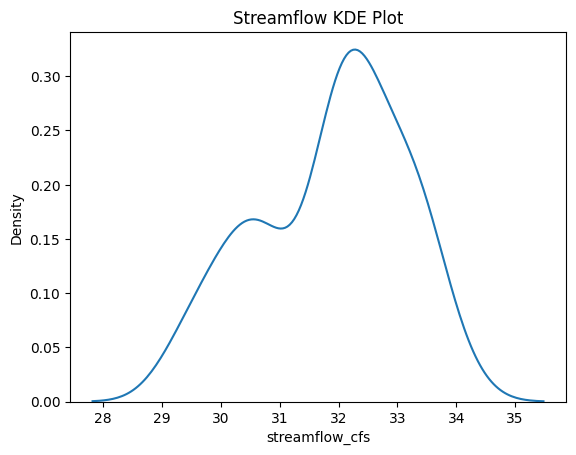

In [31]:
plt.title("Streamflow KDE Plot")
sns.kdeplot(sflow)
plt.show()

<h4><u>Scatterplot</u></h4>

Earlier in this Case Study <i>streamflow</i> (<b><i>sflow</i></b>) was specified to be the dependent variable and <i>gage height</i> (<b><i>height</i></b>) the independent variable. Let's create a scatterplot with height on the x-axis and streamflow on the y-axis. 

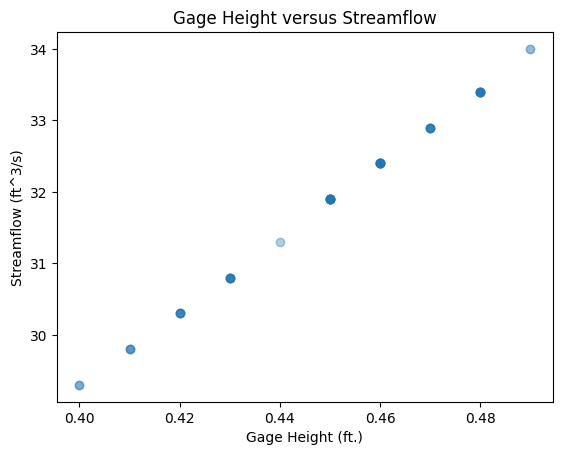

In [32]:
plt.title("Gage Height versus Streamflow")
plt.xlabel("Gage Height (ft.)")
plt.ylabel("Streamflow (ft^3/s)")
plt.scatter(height, sflow, alpha = .2)
plt.show()

The scatterplot of <b><i>height</i></b> versus <b><i>sflow</i></b> looks to display a postive linear relationship between the two. In fact, these values do not appear to randomly vary when streamflow and gage height are recorded to 2 decimal places. Let's check the correlation between the two. 

<h4><u>Correlation between Gage Height and Streamflow</u></h4>

The correlation between <b><i>height</i></b> and <b><i>sflow</i></b> can be calculated using pandas <b>corr</b> method. 

In [33]:
# Calculate correlation coefficient
sflow_height_cor = sflow.corr(height, method = "pearson")

# Print correlation coefficient
print(sflow_height_cor)

0.9997958332358903


The <b><i>correlation coefficient</i></b> is .9997. This can be interpreted as a close to perfect linear relationship between the two variables. As <i>gage height</i> increases, <i>streamflow</i> increases. 

<h4><u>The Relationship between Streamflow and Height - More Details </u></h4>

The <i>streamflow</i> measurement can be represented by the linear equation Q = A x V; where Q is the streamflow for a particular location at a particular time, A is width * depth (height) of the water in the channel, and V is the average velocity <a href = "https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured">(USGS, 2021)</a>. If the correlation coeffecient did not reflect this, it might indicate an error in the data. 

The correlation coefficient is very close to 1 because this is a very small sample of data. To more accurately represent the relationship between <i>streamflow</i> and <i>gage height (stage)</i> a rating curve is used. Streamflow values are calculated from the streamgage <i>height</i> and manually collected <i>streamflow</i> measurements taken every 6-8 weeks by a mechanical current meter to help calibrate the <i>streamflow</i> estimates <a href = "https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured">(USGS, 2021)</a>. The releationship between <i>gage height</i> and <i>streamflow</i> is then fitted with a mathematical rating curve and displayed using a semi-log plot which is then used to estimate the <i>streamflow</i> measurements like what's encountered in this Case Study's data <a href = "https://www.usgs.gov/special-topic/water-science-school/science/how-streamflow-measured">(USGS, 2021)</a>, <a href = "https://kacv.net/brad/nws/lesson6.html">(Finney, 2019)</a>. 

Let's take a look at a scatterplot displaying the <i>streamflow</i> and <i>gage height</i> measurements for <b><i>War Eagle creek for 01/01/2015 - 01/01/2021</i></b>. 

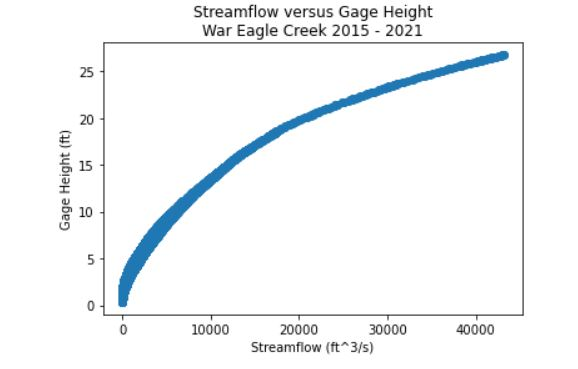</img>


This scatterplot shows that outlying large values of <i>streamflow</i> do not increase linearly. However, there is still a positive relationship between both variables. Calculating the correlation coeffiecent for this <b><i>War Eagle creek for 01/01/2015 - 01/01/2021</i></b> data gives a correlation coefficient of 0.886848. This is still a high correlation coefficient. The relationship between <i>streamflow</i> and <i>gage height</i> for  <b><i>War Eagle creek between 01/01/2015 - 01/01/2021</i></b> is still positively linearly correlated, however the linear relationship is no longer almost perfect as in the small subset of data used in this Case Study. 

This illustrates a good example of how increasing the size of the dataset can change the initial assumptions about it. The <i>streamflow</i> measurements stored in <b><i>sflow</i></b> only represent <span class="num">3 days</span> worth of measurements. The <i>streamflow</i> data in the above image represents <span class="num">6 years</span> worth of measurements. In Example 2, the <b><i>cdf</i></b> for normal random variable <b><i>sflow_rv</i></b> predicted the probability of <i>streamflow</i> exceeding 33.7ft^3/s as .0706. However, using the <b><i>2015-2019</i></b> data with the same process, results in a .6198 probability that <i>streamflow</i> exceeds 33.7ft^3/s. This is quite a bit different from the first estimate!

<h4><u>Univariate Linear Regression</u></h4>

Let's determine the equation of the regression line for the <b><i>war eagle</i></b> data sample. Recall that <i>gage height</i>, (<b><i>height</i></b>), has been specified as the independent variable and <i>streamflow</i>, (<b><i>sflow</i></b>) as the dependent variable. 

Scipy's <b>linregress</b> function is used to compute the parameters for the linear regression model. <b><i>Sflow</i></b> and <b><i>height</i></b> are specified as the arguments for the y and x parameters respectively.

In [34]:
# Linear regression 
result = stats.linregress(height, sflow)

# Print result
print(result)

LinregressResult(slope=np.float64(51.898971663215136), intercept=np.float64(8.516272854386873), rvalue=np.float64(0.9997958332358903), pvalue=np.float64(6.964189578573357e-168), stderr=np.float64(0.10595458256575303), intercept_stderr=np.float64(0.04775661129036984))


The results of the <b>linregress</b> function returns more values than will be used in this Case Study. The values of interest are the <b><i>slope</i></b> and the <b><i>intercept</i></b>. The <b><i>slope</i></b> returns a value of approximately 51.90 and the <b><i>intercept</i></b> a value of approximately 8.52. 

First, let's interpret the <b><i>intercept</i></b> value of 8.52. This can be interpreted as, when <i>gage height</i> is 0ft, <i>streamflow</i> will be 8.52ft^3/s. Next, let's interpret the <b><i>slope</i></b> of 51.90.The slope can be interpreted as, for a 1 unit increase in gage height, streamflow will increase by 51.90 ft^3/s. 

<h4><u>Plotting the Regression line</u></h4>

Now that the parameters for the regression line equation have been calculated, we can use this equation to plot the line with Matplotlib's <b>plot</b> function. 

First, a set of <i>streamflow</i> predictions, <b><i>sflow_predictions</i></b>, is created using the <b><i>intercept</i></b> and <b><i>slope</i></b> values from above. Both <b><i>sflow_predictions</i></b> and the actual values stored in <b><i>sflow</i></b> are plotted below. 

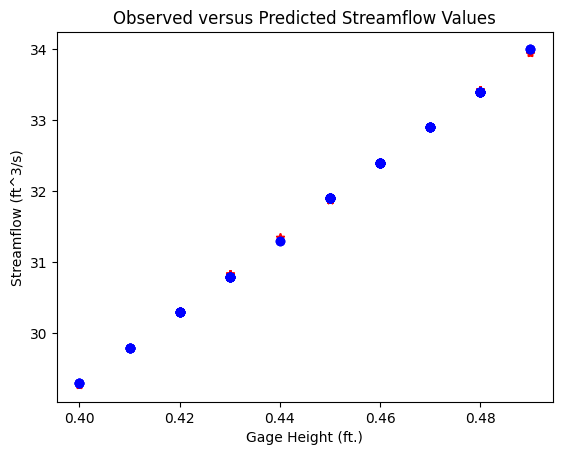

In [35]:
# Predicted values based on the fitted linear regression equation 
sflow_predictions = (result.slope * height) + result.intercept
plt.title("Observed versus Predicted Streamflow Values")
plt.xlabel("Gage Height (ft.)")
plt.ylabel("Streamflow (ft^3/s)")

plt.plot(height, sflow_predictions, "*", color = "red")
plt.plot(height, sflow, "o", color = "blue")
plt.show()

The predicted values stored in <b><i>sflow_predictions</i></b> are very close to the observed values stored in <b><i>sflow</i></b>. Next, let's plot the regression line. To do this, a series of values, generated_heights, is generated from the <b><i>minimum</i></b> <i>gage height</i> value which is <span class="num">0ft</span> to <span class="num">5ft</span> using NumPy's <b>arange</b> function and incrementing by .1. Although <i>gage height</i> values can easily exceed <span class="num">5 ft.</span>, it's selected as the maximum value to allow the observed datapoints to easily be seen on the plot. 
    
The linear regression equation is then used to generate predictions using <b><i>generated_heights</i></b> and the results stored in <b><i>predictions2</i></b>. The regression line is then plotted using Matplotlib's <b>plot</b> function. The original <i>height</i> and <i>streamflow</i> values are overlaid onto the regression line. 

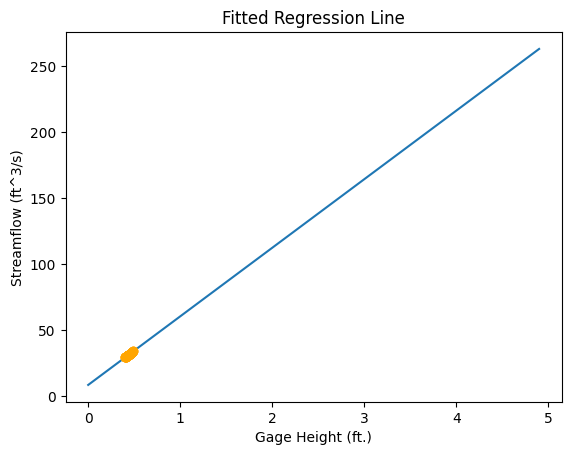

In [36]:
# Generate a range of height values from 0 to 5ft incrementing by .1
generated_heights = np.arange(0, 5, .1)

# Calculate predictions using the fitted linear regression equation 
predictions2 = (result.slope * generated_heights) + result.intercept 

# Display the regression line 
plt.plot(generated_heights, predictions2)

# Plot the height and streamflow values 
plt.plot(height, sflow, "o", color = "orange")

plt.title("Fitted Regression Line")
plt.xlabel("Gage Height (ft.)")
plt.ylabel("Streamflow (ft^3/s)")
plt.show()

The above plot shows the regression line generated from the <b><i>height</i></b> and <b><i>sflow</i></b> data. The observed data points represent a very small fraction of values that could be predicted from the regression line. The last thing we'll do in this Case Study is use the linear regression equation to predict specific values. 

<h4><u>Predicting Streamflow Values<u></h4>
    
The equation generated by fitting the regression line to <i>height</i> and <i>streamflow</i> is given by: 
    
<b><i>y = 51.898971663215136x + 8.516272854386873</i></b>
    
Recall that the <b><i>slope</i></b> can be accessed using <b>result.slope</b> and the <b><i>intercept</i></b> accessed using <b>result.intercept</b>. Using this, let's calculate the estimated <i>streamflow</i> for a <i>gage height</i> of <span class="num">2ft</span>. 
 

In [37]:
# Calculated estimate streamflow for gage height of 2ft
est_2ft = (result.slope * 2) + result.intercept

# Print result
print(est_2ft)

112.31421618081714


The estimated <i>streamflow</i> for a <i>gage height</i> of <span class="num">2ft.</span> is <span class="num">112.31ft^3/s</span>. 

<h3 class="yt">Your Turn</h3>

In this Case Study's Your Turn, you'll examine the relationship between <i>air temperature (F)</i> and <i>streamflow</i>. 

<h3 class="yt">Your Turn - 1</h3>

Calculate descriptive statistics for <b><i>air_temp</i></b> using the <b><i>we_rnd_df</i></b> DataFrame. Make sure to include the variance. <span class="bltn">Print</span> the descriptive statistics. 

In [39]:
# Your Turn - 1
air_temp_stats = we_rnd_df["air_temp"].describe()
air_temp_var = we_rnd_df["air_temp"].var()

print(air_temp_stats)
print(air_temp_var)

count    100.000000
mean      78.040000
std        9.188179
min       61.000000
25%       72.000000
50%       79.000000
75%       84.500000
max       93.000000
Name: air_temp, dtype: float64
84.42262626262628


<h3 class="yt">Your Turn - 2</h3>

Extract <i>air temperature</i> from <b><i>we_rnd_df</i></b> as a Series and store in the variable <b><i>air_temp</i></b>. Extract <i>streamflow_cfs</i> from <b><i>we_rnd_df</i></b> as a Series and store in the variable <b><i>streamflow</i></b>. Do not reuse the <b><i>sflow</i></b> variable from above! 

In [40]:
# Your Turn - 2: 
air_temp = we_rnd_df["air_temp"]
streamflow = we_rnd_df["streamflow_cfs"]

<h3 class="yt">Your Turn - 3 </h3>

Create two plots, one displaying <b><i>streamflow</i></b> and the other displaying <b><i>air temperature</i></b>. You can either use two Code cells and create seperate plots in each or use one Code cell with two subplots. Make sure your plots have a title and that the axes are labeled. 

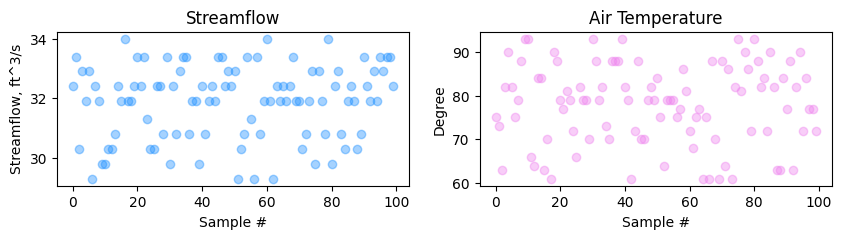

In [59]:
# Your Turn - 3
figure, axs = plt.subplots(1,2, figsize = (10,2))
axs[0].title.set_text("Streamflow")
axs[0].set_xlabel("Sample #")
axs[0].set_ylabel("Streamflow, ft^3/s")
axs[0].plot(streamflow, "o", color = "dodgerblue", alpha = .4)

axs[1].title.set_text("Air Temperature")
axs[1].set_xlabel("Sample #")
axs[1].set_ylabel("Degree")
axs[1].plot(air_temp,"o", color = "violet", alpha =.4)

plt.show()

<h3 class="yt">Your Turn - 4 </h3>

Create a scatterplot with <b><i>streamflow</i></b> on the y-axis and <b><i>Air Tempearture</i></b> on the x-axis. Make sure your scatterplot has a title and the axes are labeled. 

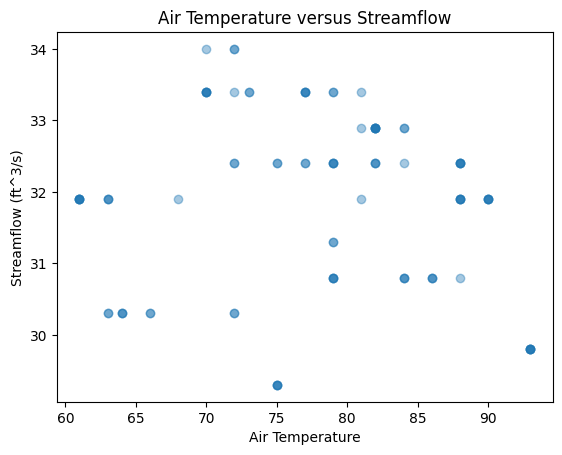

In [47]:
# Your Turn - 4
plt.title("Air Temperature versus Streamflow")
plt.xlabel("Air Temperature")
plt.ylabel("Streamflow (ft^3/s)")
plt.scatter(air_temp, streamflow, alpha = .4)
plt.show()

<h3 class="yt">Your Turn - 5 </h3>

Create a box plot with <b><i>streamflow</i></b> on the y-axis and <b><i>Air Temperature</i></b> on the x-axis. <b><i>Hint: Use sns.boxplot(x = air_temp, y = streamflow, data = we_rnd_df)

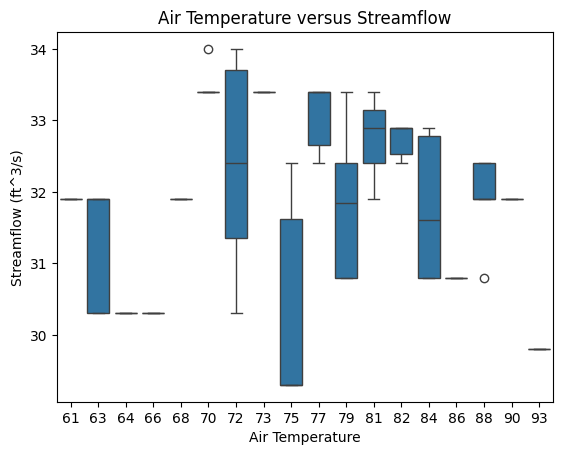

In [52]:
# Your Turn - 5
sns.boxplot(x = air_temp, y = streamflow, data = we_rnd_df)
plt.title("Air Temperature versus Streamflow")
plt.xlabel("Air Temperature")
plt.ylabel("Streamflow (ft^3/s)")

plt.show()

<h3 class="yt">Your Turn - 6</h3>

Calculate the correlation between <b><i>air_temp</i></b> and <b><i>streamflow</i></b>.  Interpret the result. 

In [54]:
# Your Turn - 6 
# Calculate correlation coefficient
temp_sflow_cor = air_temp.corr(streamflow, method = "pearson")

print(temp_sflow_cor)

-0.09149169905914269


<b><i> Your Turn - 6: Interpret the Result</i></b>

I got a correlation of -0.0915, meaning there is an extremely weak negative correlation between air temperature and streamflow. A change in air flow has very little effect on a change in the streamflow, so there is definitely another factor that plays a role in streamflow. 

<h3 class="yt">Your Turn - 7</h3>   

Run univariate linear regression using <b><i>streamflow</i></b> as the dependent variable and <b><i>Air Temperature</i></b> as the independent variable. Print the values for the intercept and slope. 

In [58]:
# Linear regression 
lin_reg = stats.linregress(air_temp, streamflow)

print(lin_reg.intercept)
print(lin_reg.slope)

32.83965091459038
-0.012348166511921744


<h3 class="yt">Your Turn - 8</h3>

The War Eagle Crek streamgage is downstream from the Winthrow Springs access. The data you have for the streamgage is from 9/4/2021 - 9/7/2021. You want to hike that area on 9/8/2021. Suppose weather conditions will be the same as the past 3 days, with no precipitation and similar temperatures. Would you be able to float War Eagle Creek? 

<b><i>There are no right or wrong answers for this question. However, make sure to justify your answer using data. </i></b>

<b><i>Your Turn -8 </i></b>

 I think I could float War Eagle Creek, as looking it up, anyhting under 500 cfs is good for floating. The values for War Eagle Creek are between 29 and 34 cfs, with warm air temperatures in the range of 60-90 degrees, so yes I think I would be able to float War Eagle Creek.